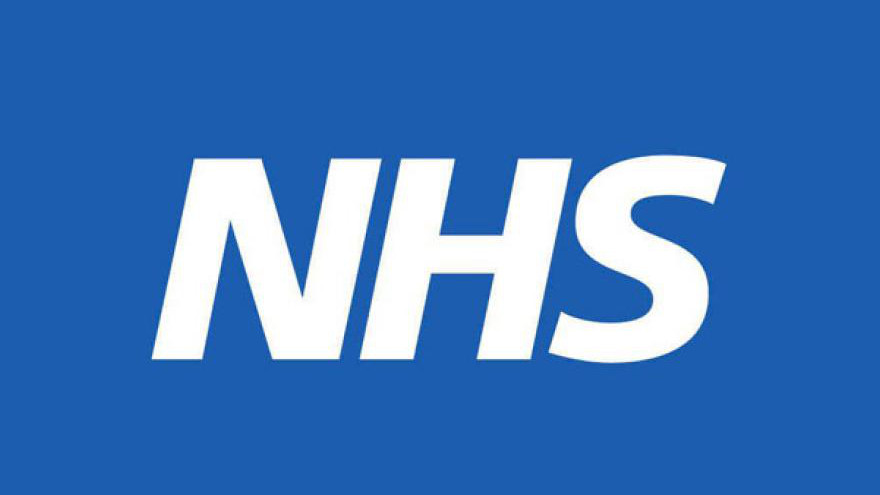

# SCRIPT 1: Data Inspection and Cleaning

## Acupuncture for chronic headache in primary care: large, pragmatic, randomised trial

### Andrew J Vickers, Rebecca W Rees, Catherine E Zollman, Rob McCarney, Claire Smith, Nadia Ellis, Peter Fisher, Robbert Van Haselen

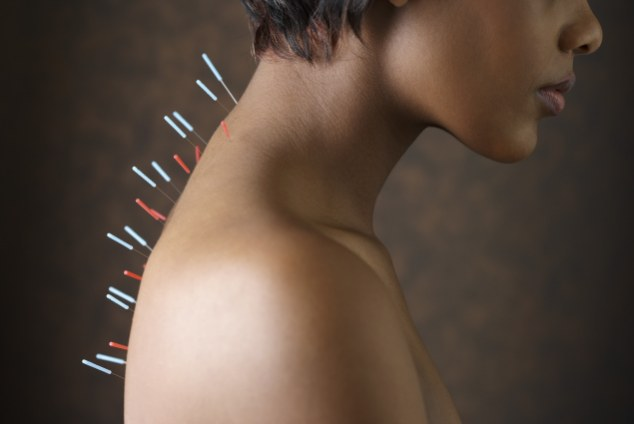

# SF-36 Questionnaire mailed to participants

## Background on the Study design

The variables are coded 1-5. "Depends on the pack from which the data were derived

Ex. "gen 1" is the general health on SF36 for pack 1 (Baseline score)
    "gen 5" 1 year SF 36 score for general health
    

- Pack 1: Baseline: headache and medication diary; SF36
- Pack 2: Three months Headache and Medication Diary, SF36 and resource use
- Pack 3: Six Months: Resource Use
- Pack 4: Nine months: Resource Use
- Pack 5: One year headache and medication diary, SF 36 and resouce use. 


# Hypotheses and Outcomes of Interest

Ha: Headache scores for the actupuncture group are significantly less than that of the control group

H0: Headache scores for the actupuncture group are not significantly less than that of the control group

variable = delta5 and global delta


H0: The number of headaches for the acupuncture group are significantly less than that of the control group

Ha: The number of headaches for the acupuncture group are not significantly less than that of the control group

variable = f5 - f1 (new variable)


Ha: Self reported scores for physical role functioning in the actupuncture group are significantly less than that of the control group

H0: Self reported scores for physical role functioning in the actupuncture group are not significantly less than that of the control group

variable = pf5 - pf1 (new variable)


Ha:Self reported scores for energy functioning in the actupuncture group are significantly less than that of the control group

H0: Self reported scores for energy functioning in the actupuncture group are not significantly less than that of the control group

variable = ef5 - ef1 (new variable)


Ha: Self reported amount of medication used in the actupuncture group are significantly less than that of the control group

H0: Self reported amount of medication used in the actupuncture group are not significantly less than that of the control group

variable = changeinpainmeds


Ha: Self reported number of sick days in the actupuncture group are significantly less than that of the control group

H0: Self reported number of sick days in the actupuncture group are not significantly less than that of the control group

variable = totaldos



# Import Libraries 

In [1]:
# Pandas is a python library that allows you to work with data in a spreadsheet-like format called "Dataframes"
import pandas as pd

# Data Dictionary

In [2]:
# read in the data dictionary from the excel sheet
data_dictionary = pd.read_excel('../Data/13063_2006_152_MOESM1_ESM.xls',sheetname='Description of variables',parse_cols="A,B")

In [3]:
# display the contents of the data dictionary
print(data_dictionary)

      Variable name                              Variable description
0                id                                   Patient ID code
1               age                                               Age
2               sex                                               Sex
3          migraine                                          Migraine
4        chronicity                                        Chronicity
5     acupuncturist                             acupuncturist id code
6   date_randomized                                                  
7       practice_id                                    GP practice id
8             group                    0 is control, 1 is acupuncture
9               pk1                   severity score pack1 (baseline)
10              pk2              severity score pack2 (posttreatment)
11              pk5          severity score pack5 (one year followup)
12               f1               headache frequency pack1 (baseline)
13               f2 

# Load in data, inspect the data

### Initial Review

In [4]:
# Load in data from source excel sheet
df = pd.read_excel('../Data/13063_2006_152_MOESM1_ESM.xls',sheetname='Data')

In [5]:
# Inspect the number of rows and columns
df.shape

(401, 94)

In [6]:
# How many study participants withdrew?
df['withdrawal_reason'].value_counts()

withdrew consent         58
intercurrent illness     16
lost to follow-up        15
treatment hassle          5
treatment ineffective     4
died                      1
adverse effects           1
Name: withdrawal_reason, dtype: int64

In [7]:
# What stage in the study did they drop out?
df['withdrawalafter'].value_counts()

5    301
1     66
2     14
4     13
3      7
Name: withdrawalafter, dtype: int64

### Observations

100 folks withdrew from the study .. most from simply withdrawing consent. Treatment ineffective was 1% of study participants. Most of those who withdrew did so after the 1st stage of the study. 

Patients couldn't have a number of preexisting conditions including pregnancy, malignancy, cluster headache, suspicion that headache disorder had specific aetiology cranial neuraligis and acupuncture treaments in the last 12 months. 

Specialist sites or general practitioners that offer accupuncture at 17 specific sites called patients about participating in the study. 

Eligible patietns completed a baseline headache diary for four weeks. Patients who provided written informed consent, had a mean weekly baseline headache score of 8.75 or more and completed at least 75% of the baseline diary were randomised to a policy of ue acupuncture or avoid acupuncture 

In [8]:
# Review a summary of statistics for each variable
df.describe()

,id,age,sex,migraine,chronicity,acupuncturist,practice_id,group,pk1,pk2,...,p5cacu,p5all,p5dos,totalacu,totalother,totalgp,totalspec,totaldos,exposure,exposuredos
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,326.000000,...,297.000000,297.000000,279.000000,334.000000,334.000000,334.000000,334.000000,333.000000,334.000000,333.000000
mean,470.872818,45.538653,0.840399,0.940150,21.458853,5.985037,24.775561,0.511222,26.509975,21.598159,...,0.030303,0.599327,2.835125,1.952096,1.838323,1.682635,0.170659,11.099850,10.670659,10.450450
std,207.167954,11.050300,0.366693,0.237506,13.766406,2.804421,11.366816,0.500499,16.163224,16.784965,...,0.223057,3.166185,4.342328,4.196822,6.158875,2.426307,0.749920,14.412725,2.591145,2.691146
min,100.000000,18.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000,6.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,292.000000,39.000000,1.000000,1.000000,10.000000,3.000000,16.000000,0.000000,15.000000,10.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,9.000000
50%,468.000000,48.000000,1.000000,1.000000,20.000000,6.000000,22.000000,1.000000,21.000000,16.875000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,6.000000,12.000000,12.000000
75%,638.000000,53.000000,1.000000,1.000000,31.000000,8.000000,34.000000,1.000000,34.250000,27.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,0.000000,15.000000,12.000000,12.000000
max,912.000000,65.000000,1.000000,1.000000,54.000000,12.000000,58.000000,1.000000,94.750000,98.500000,...,2.000000,48.000000,35.000000,24.000000,50.000000,16.000000,6.000000,92.000000,12.000000,12.000000


# Hypotheses and Outcomes of Interest

Ha: Headache scores for the actupuncture group are significantly less than that of the control group

H0: Headache scores for the actupuncture group are not significantly less than that of the control group

variable = delta5 and global delta


H0: The number of headaches for the acupuncture group are significantly less than that of the control group

Ha: The number of headaches for the acupuncture group are not significantly less than that of the control group

variable = f5 - f1 (new variable)


Ha: Self reported scores for physical role functioning in the actupuncture group are significantly less than that of the control group

H0: Self reported scores for physical role functioning in the actupuncture group are not significantly less than that of the control group

variable = pf5 - pf1 (new variable)


Ha:Self reported scores for energy functioning in the actupuncture group are significantly less than that of the control group

H0: Self reported scores for energy functioning in the actupuncture group are not significantly less than that of the control group

variable = ef5 - ef1 (new variable)


Ha: Self reported amount of medication used in the actupuncture group are significantly less than that of the control group

H0: Self reported amount of medication used in the actupuncture group are not significantly less than that of the control group

variable = changeinpainmeds


Ha: Self reported number of sick days in the actupuncture group are significantly less than that of the control group

H0: Self reported number of sick days in the actupuncture group are not significantly less than that of the control group

variable = totaldos



# What target variables are needed and what variables should we bring for analysis?

-id
-age
-sex
-acupuncturist
-group
-migraine
-chronicity
-delta5
-global delta
-f1
-f5
-pf1
-pf5
-ef1
-ef5
-changeinpainmeds
-totaldos

In [9]:
df.columns

Index(['id', 'age', 'sex', 'migraine', 'chronicity', 'acupuncturist',
       'date_randomized', 'practice_id', 'group', 'pk1', 'pk2', 'pk5', 'f1',
       'f2', 'f5', 'pf1', 'rlp1', 'rle1', 'ef1', 'ewb1', 'sf1', 'p1', 'gen1',
       'hc1', 'pf2', 'rlp2', 'rle2', 'ef2', 'ewb2', 'sf2', 'p2', 'gen2', 'hc2',
       'pf5', 'rlp5', 'rle5', 'ef5', 'ewb5', 'sf5', 'p5', 'gen5', 'hc5',
       'withdrawal_reason', 'painmedspk1', 'painmedspk2', 'painmedspk5',
       'totalfumeds', 'changeinpainmeds', 'prophylacticdose1', 'prophmqs1',
       'prophylacticdose2', 'prophmqs2', 'prophylacticdose5', 'prophmqs5',
       'allmedsfu', 'allmedsbaseline', 'acuptreatments',
       'completedacupuncturetreatment', 'withdrawalafter', 'completer',
       'delta2', 'delta5', 'pchange', 'response', 'global1', 'global5',
       'globaldelta', 'p2cgp', 'p2cspec', 'p2cacu', 'p2all', 'p2dos', 'p3cgp',
       'p3cspec', 'p3cacu', 'p3all', 'p3dos', 'p4cgp', 'p4cspec', 'p4cacu',
       'p4all', 'p4dos', 'p5cgp', 'p5cspec

In [10]:
df_select_columns = df[['id','age','sex','acupuncturist','group','migraine','chronicity','delta5','globaldelta','f1','f5','pf1','pf5','ef1','ef5','changeinpainmeds','totaldos']]


In [15]:
df_select_columns.to_excel('../Data/acupuncture_analysis_input.xlsx')

In [ ]:
# end script 1